In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

Federal University of Santa Catarina (UFSC)

Computer Science Graduate Program (PPGCC)


# INE410416 - Applied Machine Learning
## Lecture 5 - Feature Selection
#### Prof. Dr. Jônata Tyska Carvalho
#### Prof. Dr. Mateus Grellert da Silva

<font size="10"> Is more data always desirable? </font>

<img src="https://images.unsplash.com/photo-1495592822108-9e6261896da8?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1470&q=80" width="60%" />

Image source: https://unsplash.com/photos/n6B49lTx7NM

<font size="10"> Outline </font>

<font size="5">
    
- Introduction
    
- Types of selection   
    - Filter
    - Wrapper
    - Embedded (intrinsic)
   
- Some interesting analysis

- How to choose?
       
</font>


<font size="10"> Introduction </font>

**Predictive modelling goal:** finding features that capture a predictive relationship with the outcome variable.

Logically, not all features will be relevant, and their relevance will differ.

<font size="10"> Introduction </font>

- The Performance of many models degrades in the presence of uninformative features

- What about doing more with less?
   - Less complex models (Occam's Razor)
   - More interpretability (overall)
   - Save money with:
       - computing power
       - storage
       - bandwith
       - hardware

What to do? **FEATURE SELECTION**

<font size="10"> Introduction </font>

**Feature selection** is a data reduction step that seeks reducing the number of predictors as far as possible without compromising models' predictive performance (even better, increasing it)

Three main categories:

- Filter: supervised analysis of the predictors to determine their importance, providing only 'the most important' to the model 
- Wrapper: search relevant feature subsets by iteratively supplying them to a model, and choosing the best performing ones at each step
- Embedded: feature selection is inherently incorporated in the model

<font size="10"> Types of selection - Filter </font>

- Features are evaluated separately (not a hard rule)
- A predictive quality/importance metric (usually statistical) is used to filter features

**Advantages:**

    - Simple
    - Fast
    - Effective in capturing large predictor-outcome trends

<font size="10"> Types of selection - Filter </font>

**Disadvantages:**

    - prone to over-selecting predictors (correlated)
    - quality metric disconnected from the objective function 
    (predictive performance)

<font size="10"> Types of selection - Filter </font>

Variance Threshold Example

In [ ]:
#filter example - Variance Threshold

# load data to dict derived class Bunch
iris = datasets.load_iris()
target = datasets.load_iris().target


# convert to dataframe for processing 
iris = pd.DataFrame(iris.data, columns = iris.feature_names)

In [ ]:
#normalizing with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris)
iris_norm=scaler.transform(iris)

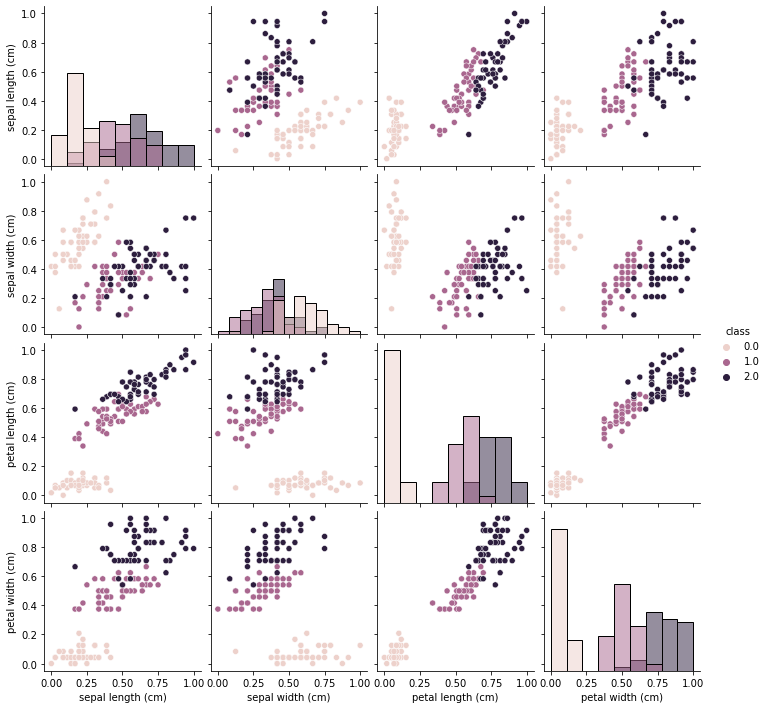

In [ ]:
# visualizing features and target
iris_norm = pd.DataFrame(iris_norm, columns = iris.columns)
iris_norm_ = pd.DataFrame(np.hstack((iris_norm, target[:, np.newaxis])), columns = iris.columns.tolist() + ['class'])
sns.pairplot(iris_norm_, hue = 'class', diag_kind='hist')

In [ ]:
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(threshold=.05)
thresholder.fit(iris_norm)
selected_features = thresholder.get_support()
iris_norm.loc[:,selected_features]

,sepal length (cm),petal length (cm),petal width (cm)
0,0.222222,0.067797,0.041667
1,0.166667,0.067797,0.041667
2,0.111111,0.050847,0.041667
3,0.083333,0.084746,0.041667
4,0.194444,0.067797,0.041667
...,...,...,...
145,0.666667,0.711864,0.916667
146,0.555556,0.677966,0.750000
147,0.611111,0.711864,0.791667
148,0.527778,0.745763,0.916667


<font size="10"> Types of selection - Filter </font>

Statistical quality metric example

In [ ]:
#filter example with quality metric (statistical) 
from sklearn.feature_selection import SelectKBest, f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=3)
iris_trim = bestfeatures.fit_transform(iris_norm, target)
print(bestfeatures.scores_)
print(bestfeatures.pvalues_)
print(iris_trim.shape)

[ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
[1.66966919e-31 4.49201713e-17 2.85677661e-91 4.16944584e-85]
(150, 3)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

def train_and_validate(X_train, X_test, y_train, y_test):
    mode = GaussianNB()    
    mode.fit(X_train, y_train);
    y_calc = mode.predict(X_test)
    y_prob = mode.predict_proba(X_test)
    #print(y_prob)
    mat = confusion_matrix(y_test, y_calc)
    sns.heatmap(mat.T, annot=True, cbar = False)

In [ ]:
X_train4, X_test4, y_train, y_test = train_test_split(iris_norm, target, test_size = 0.10, stratify = None, random_state=0)
X_train3, X_test3 = X_train4.drop(['sepal width (cm)'], axis=1), X_test4.drop(['sepal width (cm)'], axis=1)

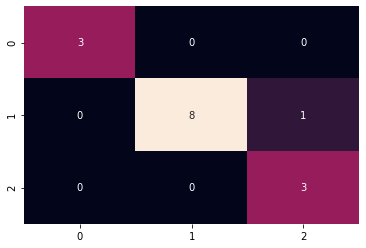

In [ ]:
train_and_validate(X_train4,X_test4, y_train,y_test)

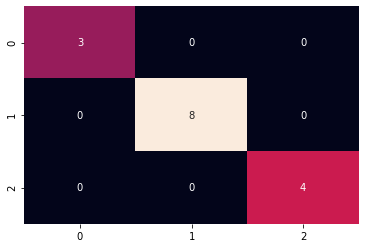

In [ ]:
train_and_validate(X_train3,X_test3, y_train,y_test)

<font size="5"> Filter methods score metrics summary </font>
<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/filter_methods_summary.png" width="50%" />

<font size="10"> Be careful: Avoid Overfitting! </font>

Predictors overfitting can happen! 

What does that mean? A subset of features that has good predictive performance on the training set, but has poor performance on the test set (or new/real world ones). 

Can you believe this is random data?

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/feature_selection_random.png" width="50%" />

Randomly generated data (150x10.000) + feature selection (300 predictors) + PCA

What to do? **<font size="10"> Resampling </font>**

The use of resampling techniques may be important (as cross-validation).

Notable implications:

1. more realistic estimate of predictive performance (it is less prone to predictor overfitting);

2. It faces an increase in computational burden;

Resampling (external validation) is especially useful when:

1. small data set
2. number of features >> instances
3. extreme class imbalance

What to do? **<font size="10"> Resampling </font>**

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/filter_methods_resampling.png" width="70%" />

<font size="10"> Types of selection - Wrapper </font>

- Iteratively test subsets of features using a given model
- If successful, it reduces the number of features
- Can be divided in: 
    - greedy: RFE
    - non-greedy: Genetic Algorithms, Simulated Annealing and so on

**Advantages:**

    - more extensive search than filter and embedded methods
    - most potential to find the globally best features subset (if it exists)    

<font size="10"> Types of selection - Wrapper </font>

**Disadvantages:**

    - computationaly expensive (sometimes unfeasible) - worst depending on the chosen model
    - most potential to overfit the predictors to the training data (external validation required)

<font size="10"> Types of selection - Wrapper </font>

Recursive Feature Elimination (RFE) Example

In [ ]:
#example of wrapper method - RFE

## how accuratelly can we define the weight (in pounds) of an adult male given his body dimensions?
ansur = pd.read_csv('https://codigos.ufsc.br/jonata.tyska/repositorio/-/raw/master/datasets/ansur_male.csv',error_bad_lines=False, encoding='latin-1')
#extracted from https://www.kaggle.com/seshadrikolluri/ansur-ii

ansur.shape

(4082, 108)

In [ ]:
#dropping irrelevant and categorical features, also 'cheat' ones (weightkg)
drop_cols = ['weightkg','WritingPreference','Ethnicity','SubjectsBirthLocation','PrimaryMOS','Branch','Component','Installation','Date','Gender','subjectid']
ansur.drop(drop_cols, inplace=True,axis=1)

# Feature, target arrays
X, y = ansur.iloc[:, :-1], ansur.iloc[:, -1]

# Train/test set generation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1121218
)

In [ ]:
# Scale train and test sets with StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [ ]:
# Init, fit, test Random Forest Regressor
forest = RandomForestRegressor()
_ = forest.fit(X_train_std, y_train)
forest.score(X_test_std, y_test)

0.9277774981631275

In [ ]:
#checking the importances extracted with RandomForest
pd.DataFrame(
    zip(X_train.columns, abs(forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,DODRace,0.000179
1,SubjectNumericRace,0.000275
2,Heightin,0.000290
3,earbreadth,0.000356
4,waistheightomphalion,0.000368
...,...,...
91,lowerthighcircumference,0.013032
92,shouldercircumference,0.027118
93,verticaltrunkcircumferenceusa,0.029898
94,chestcircumference,0.085006


In [ ]:
#using RFE with Resampling (CV)
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Init, fit
rfecv = RFECV(
    estimator=LinearRegression(),
    min_features_to_select=5,
    step=5,
    n_jobs=-1,
    scoring="r2",
    cv=5,
)

_ = rfecv.fit_transform(X_train_std, y_train)

In [ ]:
print("Total columns: ",X_train.columns.shape[0]," Selected columns: ",X_train.columns[rfecv.support_].shape[0])
print(X_train.columns[rfecv.support_])

Total columns:  96  Selected columns:  46
Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference',
       'bicepscircumferenceflexed', 'bideltoidbreadth', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'chestcircumference', 'chestdepth', 'chestheight',
       'crotchlengthomphalion', 'footlength', 'forearmcircumferenceflexed',
       'heelbreadth', 'iliocristaleheight', 'interscyei', 'interscyeii',
       'kneeheightsitting', 'lateralfemoralepicondyleheight',
       'lowerthighcircumference', 'neckcircumference', 'neckcircumferencebase',
       'radialestylionlength', 'shouldercircumference', 'sittingheight',
       'sleeveoutseam', 'stature', 'suprasternaleheight', 'tenthribheight',
       'thighcircumference', 'thighclearance', 'thumbtipreach',
       'trochanterionheight', 'verticaltrunkcircumferenceusa',
   

In [ ]:
X_train_sel_std = StandardScaler().fit_transform(X_train.loc[:,rfecv.support_])
X_test_sel_std = StandardScaler().fit_transform(X_test.loc[:,rfecv.support_])

In [ ]:
_ = forest.fit(X_train_std, y_train)
print("Random forest with all",X_train_std.shape[1],"features R-squared:", forest.score(X_test_std, y_test))
_ = forest.fit(X_train_sel_std, y_train)
print("Random forest with the",X_test_sel_std.shape[1],"selected features R-squared:", forest.score(X_test_sel_std, y_test))

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=1, max_iter=500)
_ = mlp.fit(X_train_std, y_train)
print("MLP Regressor with all ",X_train_std.shape[1],"features R-squared:",mlp.score(X_test_std, y_test))
_ = mlp.fit(X_train_sel_std, y_train)
print("MLP Regressor with the",X_test_sel_std.shape[1],"selected features R-squared:",mlp.score(X_test_sel_std, y_test))

Random forest with all 96 features R-squared: 0.9288032946862418
Random forest with the 46 selected features R-squared: 0.9337480932380581
MLP Regressor with all  96 features R-squared: 0.8955198621874043
MLP Regressor with the 46 selected features R-squared: 0.9388254557420056


<font size="10"> Types of selection - Wrapper </font>

Sequential Feature Selection (SFS) - Forward/Backward - Example

In [ ]:
#example of Sequential Feature Selection - Forward/Backward
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

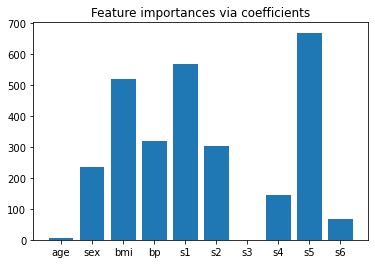

In [ ]:
lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01

tic = time()
sfm = SelectFromModel(lasso, threshold=threshold).fit(X, y)
toc = time()

# selecting through embedded models
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['s1' 's5']
Done in 0.053s


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    lasso, n_features_to_select=2, direction="forward"
).fit(X, y)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    lasso, n_features_to_select=2, direction="backward"
).fit(X, y)
toc_bwd = time()

In [ ]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['bmi' 's5']
Done in 2.917s
Features selected by backward sequential selection: ['bmi' 's5']
Done in 9.118s


<font size="10"> Types of selection - Embedded </font>

- Feature selection inherently incorporated in the model (Tree, rule-based models, MARS and models with regularization)


**Advantages:**

    - relatively fast since FS is incorporated in the model building
    - no external FS is needed
    - direct connection between FS and the objective function

<font size="10"> Types of selection - Embedded </font>

**Disadvantages:**

    - model-dependent - sub-optimal when data are better fit by a non-intrinsic method
    - some models use a greedy approach (single tree models) selecting a narrow and sub-optimal set of features

<font size="10"> Types of selection - Embedded </font>

Tree-based embedded example

In [ ]:
#example of embedded method
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [ ]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

[0.07780508 0.04452505 0.43958709 0.43808279]


(150, 2)

<font size="10"> Some interesting analysis </font>

Let's assess the sensibility of the learning algorithms to irrelevant features.

Suppose the relevant features are the following:

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/irrelevant_features_equation.png" width="100%" />


<font size="10"> Some interesting analysis </font>

Let's see how different methods behave with an increasing number of irrelevant features.

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/irrelevant_features_analysis.png" width="80%" />

*This analysis should not be taken as an Universal Truth (remember the no free lunch problem) but as an estimate of how the different methods behave*

<font size="10"> How to choose? </font>

A good strategy can be:

1. Start the feature selection process with one or more intrinsic methods to see what they yield. Try linear and non-linear intrinsic models;
3. if non-linear intrinsic models provide better performance: proceed with a wrapper using a non-linear model; 
4. if the linear intrinsic model provided the best resul:, use a linear model with the wrapper method instead;

When multiple methods 'fail', it might be an indicator that reducing features is not  feasible.

See an interesting approach at the bonus section of: https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2


<font size="10"> A possible check-list </font>

Guyon and Elisseeff (2003) provide this useful check-list:


1. **Do you have domain knowledge?** If yes, construct a better set of ad hoc features
2. **Are your features commensurate?** If no, consider normalizing them.
3. **Do you suspect interdependence of features?** If yes, expand your feature set by constructing conjunctive features or products of features, as much as your computer resources allow you.


<font size="10"> A possible check-list </font>

Guyon and Elisseeff (2003) provide this useful check-list:


4. **Do you need to prune the input variables (e.g. for cost, speed or data understanding reasons)?** If no, construct disjunctive features or weighted sums of feature
5. **Do you need to assess features individually (e.g. to understand their influence on the system or because their number is so large that you need to do a first filtering)?** If yes, use a variable ranking method; else, do it anyway to get baseline results.
6. **Do you need a predictor?** If no, stop



<font size="10"> A possible check-list </font>

Guyon and Elisseeff (2003) provide this useful check-list:


7. **Do you suspect your data is “dirty” (has a few meaningless input patterns and/or noisy outputs or wrong class labels)?** If yes, detect the outlier examples using the top ranking variables obtained in step 5 as representation; check and/or discard them.



<font size="10"> A possible check-list </font>

Guyon and Elisseeff (2003) provide this useful check-list:


8. **Do you know what to try first?** If no, use a linear predictor. Use a forward selection method with the “probe” method as a stopping criterion or use the 0-norm embedded method for comparison, following the ranking of step 5, construct a sequence of predictors of same nature using increasing subsets of features. Can you match or improve performance with a smaller subset? If yes, try a non-linear predictor with that subset.

<font color="red"> I WOULD BE CAREFUL WITH THIS ONE DUE THE STEPWISE METHOD.  I PREFER KUHN & JOHNSON (2019) STRATEGY. </font>


<font size="10"> A possible check-list </font>

Guyon and Elisseeff (2003) provide this useful check-list:


9. **Do you have new ideas, time, computational resources, and enough examples?** If yes, compare several feature selection methods, including your new idea, correlation coefficients, backward selection and embedded methods. Use linear and non-linear predictors. Select the best approach with model selection
10. **Do you want a stable solution (to improve performance and/or understanding)?** If yes, subsample your data and redo your analysis for several “bootstrap”. 



<font size="10"> Is there a '*silver bullet*' method? </font>

According to Bommert et al. (2020) about filter methods:

"Based on an analysis of 22 methods and 16 high-dimentional datasets...**there is no group of filter methods that always outperforms all other methods...**"

"**We found out that there is no subset of filter methods that performs better than the rest of the filter methods on all data sets.**"

"**on average all filter methods performed better than not filtering at all**"

<font size="10"> Bibliography for this lecture </font>

Kuhn, M., & Johnson, K. (2019). Feature engineering and selection: A practical approach for predictive models. CRC Press.

Guyon, I., & Elisseeff, A. (2003). An introduction to variable and feature selection. Journal of machine learning research, 3(Mar), 1157-1182.

Bommert, A., Sun, X., Bischl, B., Rahnenführer, J., & Lang, M. (2020). Benchmark for filter methods for feature selection in high-dimensional classification data. Computational Statistics & Data Analysis, 143, 106839.

Smith, G. (2018). Step away from stepwise. Journal of Big Data, 5(1), 1-12.

Narisetty, N. N. (2020). Bayesian model selection for high-dimensional data. In Handbook of Statistics (Vol. 43, pp. 207-248). Elsevier. (Section 2)



Examples (partially) extracted from:

https://towardsdatascience.com/how-to-use-variance-thresholding-for-robust-feature-selection-a4503f2b5c3f

https://medium.com/nerd-for-tech/data-engineering-a-feature-selection-example-with-the-iris-dataset-11f0554e4b00

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py

https://towardsdatascience.com/powerful-feature-selection-with-recursive-feature-elimination-rfe-of-sklearn-23efb2cdb54e